In [46]:
import torch
import numpy as np
torch.manual_seed(100)

In [47]:
import torch
#from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


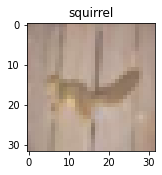

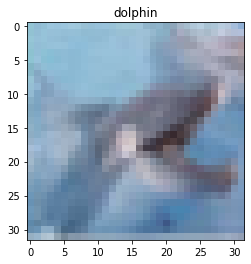

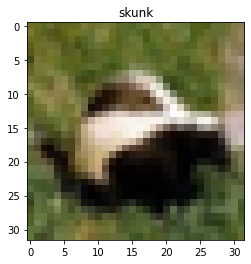

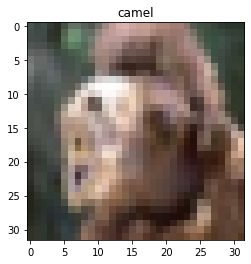

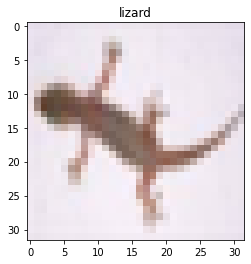

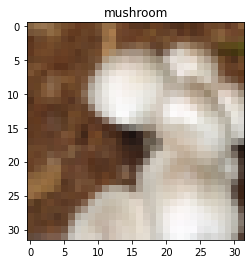

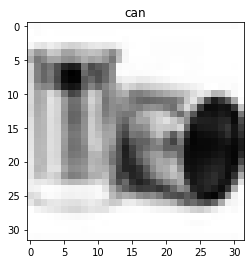

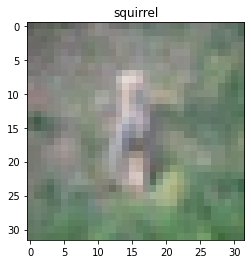

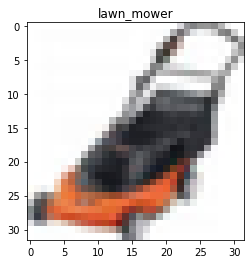

In [48]:
from operator import imod
labels_map = {
    0: 'apple',
    1: 'aquarium_fish',
    2: 'baby',
    3: 'bear',
    4: 'beaver',
    5: 'bed',
    6: 'bee',
    7: 'beetle',
    8: 'bicycle',
    9: 'bottle',
    10: 'bowl',
    11: 'boy',
    12: 'bridge',
    13: 'bus',
    14: 'butterfly',
    15: 'camel',
    16: 'can',
    17: 'castle',
    18: 'caterpillar',
    19: 'cattle',
    20: 'chair',
    21: 'chimpanzee',
    22: 'clock',
    23: 'cloud',
    24: 'cockroach',
    25: 'couch',
    26: 'cra',
    27: 'crocodile',
    28: 'cup',
    29: 'dinosaur',
    30: 'dolphin',
    31: 'elephant',
    32: 'flatfish',
    33: 'forest',
    34: 'fox',
    35: 'girl',
    36: 'hamster',
    37: 'house',
    38: 'kangaroo',
    39: 'keyboard',
    40: 'lamp',
    41: 'lawn_mower',
    42: 'leopard',
    43: 'lion',
    44: 'lizard',
    45: 'lobster',
    46: 'man',
    47: 'maple_tree',
    48: 'motorcycle',
    49: 'mountain',
    50: 'mouse',
    51: 'mushroom',
    52: 'oak_tree',
    53: 'orange',
    54: 'orchid',
    55: 'otter',
    56: 'palm_tree',
    57: 'pear',
    58: 'pickup_truck',
    59: 'pine_tree',
    60: 'plain',
    61: 'plate',
    62: 'poppy',
    63: 'porcupine',
    64: 'possum',
    65: 'rabbit',
    66: 'raccoon',
    67: 'ray',
    68: 'road',
    69: 'rocket',
    70: 'rose',
    71: 'sea',
    72: 'seal',
    73: 'shark',
    74: 'shrew',
    75: 'skunk',
    76: 'skyscraper',
    77: 'snail',
    78: 'snake',
    79: 'spider',
    80: 'squirrel',
    81: 'streetcar',
    82: 'sunflower',
    83: 'sweet_pepper',
    84: 'table',
    85: 'tank',
    86: 'telephone',
    87: 'television',
    88: 'tiger',
    89: 'tractor',
    90: 'train',
    91: 'trout',
    92: 'tulip',
    93: 'turtle',
    94: 'wardrobe',
    95: 'whale',
    96: 'willow_tree',
    97: 'wolf',
    98: 'woman',
    99: 'worm'
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # Случайный индекс из датасета
    image, label = training_data[sample_idx] # Обращение по такому индексу возвращает изображение и метку элемента датасета
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    img = np.transpose(image.squeeze(), (1, 2,0))
    plt.imshow(img)
    plt.show()


In [49]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [51]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(7, 7), stride=2, padding=(3, 3), bias=True),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5, 5), stride=2, padding=(2, 2), bias=True),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=(3, 3), stride=1, padding=(0, 0), bias=True),
            nn.ReLU(),
            nn.Conv2d(in_channels=96, out_channels=192, kernel_size=(3, 3), stride=1, padding=(0, 0), bias=True),
            nn.ReLU(),
            nn.Conv2d(in_channels=192, out_channels=384, kernel_size=(3, 3), stride=1, padding=(0, 0), bias=True),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=(2,2), stride=2, padding=0),
            nn.Flatten(),
            nn.Linear(384, 100),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [52]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [53]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 96, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=384, out_features=100, bias=True)
  )
)


In [54]:
params = 0
for p in list(model.parameters()):
        tmp=1
        for s in list(p.size()):
            tmp = tmp*s
        params += tmp
params

979908

In [55]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()

In [56]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [57]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
          

In [58]:
def test_loop(dataloader, model, loss_fn):
    global best
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return 100*correct

In [59]:
best = 0
best_id = 0

In [ ]:
epochs = 300

for t in range(epochs):
      print(f"Epoch {t+1}\n-------------------------------")
      model.train(True)
      train_loop(train_dataloader, model, loss_fn, optimizer)
      model.train(False)
      correct = test_loop(test_dataloader, model, loss_fn)
      if (correct > best):
        best = correct
        best_id = t
        print(f"Best:{best:>0.1f}\n")
        checkpoint_filename = str(t) +"_"+str(params)+"_" +  f"Acc:_{correct:>0.1f}%.pt"
        torch.save(model.state_dict(), checkpoint_filename)
print("Done!")

In [ ]:
print("Best result on "+str(best_id))